In [1]:
%matplotlib inline
import numpy as np
import quantfin as qf
import matplotlib.pyplot as plt

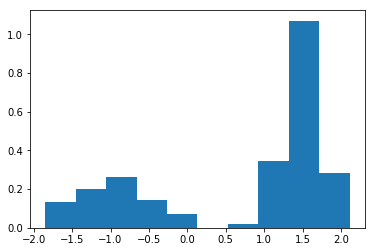

In [2]:
# Sample data from a mixed Gaussian distribution
N = 250
mus = [1.5, -1.0]
sigmas = [0.25, 0.5]
rs = [0.7, 0.3]
x = qf.random.sample.mixed_gaussian(mus, sigmas, rs, size=N)
plt.hist(x, density=True);

In [3]:
# Fit a mixed Gaussian distribution to the data
mus_pred, sigmas_pred, rs_pred = qf.stats.fit_mixed_gaussian(x, 2, epsilon=1e-5)

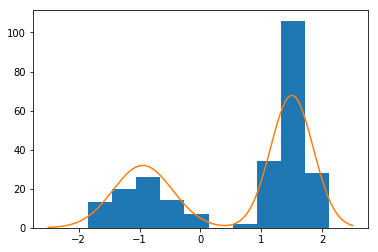

In [4]:
# Plot the fitted distribution over the random data
ts = np.linspace(-2.5, 2.5, 250)
y = qf.stats.pdfs.mixed_gaussian(ts, mus_pred, sigmas_pred, rs_pred)
plt.hist(x)
plt.plot(ts, y*N);

In [5]:
# Errors in estimated parameters
print(mus_pred - mus)
print(sigmas_pred - sigmas)
print(rs_pred - rs)

[ 0.00188057  0.05286586]
[-0.00635085 -0.02329299]
[-0.02000203  0.02000203]
